## Blurring and Smoothing

Blurring and smoothing are essential tools for a computer vision engineer. Its usually a precursor to more advance 
techniques like edge detection etc.

### Why do we Blur or Smoothen

![image](images/grainy_picture.png)

Most real pictures have some sort of grainyness or noise in them. For e.g. in the picture above we have shown how pixel values would look along a single axis. The value of the pixel is going from low to high and it won't be a smooth step function. It will be noisy and determining the point of transition is difficult. So we use smoothening to enable algorithms to identify a midpoint as point of transition.

![image](images/smoothened_grainy_picture.png)

Blurring and smoothing involves running a convolution with a small kernel. We will see different types of smoothening algorithms in the section below

In [1]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

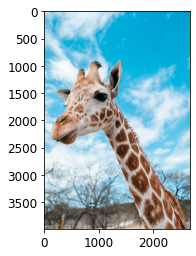

In [2]:
image = cv2.imread("images/giraffe.jpg")
plt.imshow(fixColor(image))

### Blurring by average

Average blurring means the output pixel is an average of the pixel under convolution. 

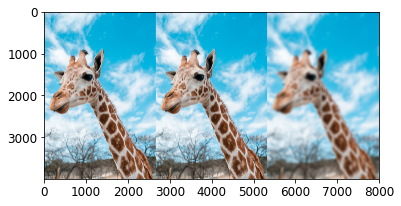

In [3]:
blurred = np.hstack([ cv2.blur(image, (3, 3)), cv2.blur(image, (5, 5)), cv2.blur(image, (70, 70))])
plt.imshow(fixColor( blurred) )

### Gaussian Blurring 

In a Gaussian blur the output is a weighted mean of the surrounding pixels. The closer pixels have a higher weightage.

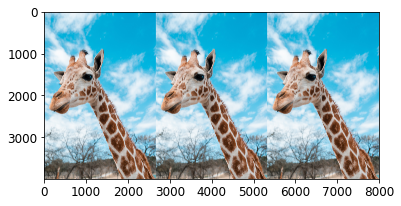

In [4]:
blurred = np.hstack([ cv2.GaussianBlur(image, (3, 3), 0),cv2.GaussianBlur(image, (5, 5), 0), cv2.GaussianBlur(image, (7, 7), 0),])
plt.imshow(fixColor( blurred) )

### Median Blurring

Median blurring is used to remove small noise like salt and pepper noise from a pic. In the convolution process it will take the median of the pixels in the kernel.

Note the kernel size should be a odd number while using this

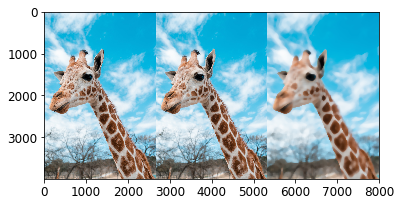

In [5]:
blurred = np.hstack([ cv2.medianBlur(image, 3), cv2.medianBlur(image, 5), cv2.medianBlur(image, 71)])
plt.imshow(fixColor(blurred))

### Bilateral Blurring

Bilateral uses 2 Gaussians distributions. The first Gaussian function only considers spatial neigh- bors, that is, pixels that appear close together in the (x, y) coordinate space of the image. The second Gaussian then models the pixel intensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

Overall, this method is able to preserve edges of an im- age, while still reducing noise. It is however slower.

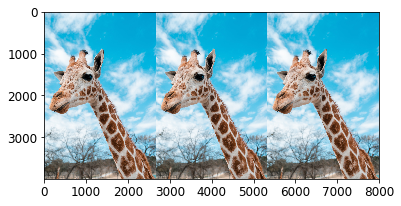

In [8]:
blurred = np.hstack([ cv2.bilateralFilter(image, 5, 21, 21), cv2.bilateralFilter(image, 7, 31, 31), cv2.bilateralFilter(image, 9, 41, 41)])
plt.imshow(fixColor(blurred))